<a href="https://colab.research.google.com/github/SadhnaBijrothiya/DL/blob/main/Copy_of_Copy_of_1D_CNN%2CGRU%5BHAR%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install keras-tuner --upgrade

     |████████████████████████████████| 98 kB 2.9 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
import keras_tuner as kt
from keras.callbacks import ModelCheckpoint
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
RANDOM_SEED=42

In [ ]:
#Importing libraries
import sys 
import numpy
import xlrd #excel read
import pandas as pd
import os
import matplotlib.pyplot as plt
import io
import math
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from scipy.signal import savgol_filter
from scipy import signal
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
 
from tensorflow import keras, convert_to_tensor, float32, make_ndarray
from tensorflow.compat.v1 import Session
from tensorflow.keras import layers, backend
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Input, GlobalAveragePooling1D, Dropout
from tensorflow.keras.layers import LSTM, GRU, Conv1D, MaxPooling1D, MaxPool1D, TimeDistributed, RepeatVector, Conv2D
from keras.layers.merge import concatenate
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import random
from sklearn.metrics import mean_absolute_error

In [ ]:
COLUMN_NAMES = [ 'user','activity','timestamp','x-axis','y-axis','z-axis']
LABELS = ['Downstairs','Jogging','Sitting','Standing','Upstairs','Walking']

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
data=pd.read_csv('/content/MyDrive/MyDrive/WISDM_ar_v1.1_raw1.txt', header = None, names = COLUMN_NAMES)
data = data.dropna()

FileNotFoundError: ignored

In [ ]:
data['activity'].value_counts()

NameError: ignored

In [ ]:
data.head()
print('Total rows : ', len(data))

NameError: ignored

In [ ]:
data.shape

(1098203, 6)

In [ ]:
"""file = open('/content/MyDrive/MyDrive/WISDM_ar_v1.1_raw1.txt')
lines = file.readlines()

processedList = []

for i, line in enumerate(lines):
    try:
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        if last == '':
            break;
        temp = [line[0], line[1], line[2], line[3], line[4], last]
        processedList.append(temp)
    except:
        print('Error at line number: ', i)"""

"file = open('/content/MyDrive/MyDrive/WISDM_ar_v1.1_raw1.txt')\nlines = file.readlines()\n\nprocessedList = []\n\nfor i, line in enumerate(lines):\n    try:\n        line = line.split(',')\n        last = line[5].split(';')[0]\n        last = last.strip()\n        if last == '':\n            break;\n        temp = [line[0], line[1], line[2], line[3], line[4], last]\n        processedList.append(temp)\n    except:\n        print('Error at line number: ', i)"

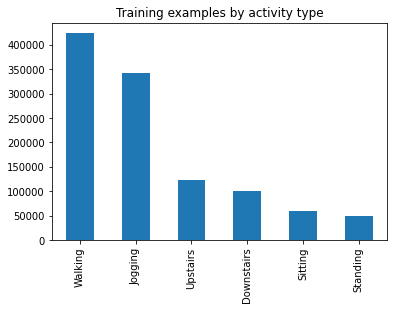

In [ ]:
data['activity'].value_counts().plot(kind='bar', title='Training examples by activity type');

In [ ]:
# Normalize features for training data set (values between 0 and 1)
# Surpress warning for next 3 operation
pd.options.mode.chained_assignment = None  # default='warn'

data['x-axis'] = data['x-axis'] / data['x-axis'].max()
data['y-axis'] = data['y-axis'] / data['y-axis'].max()
data['z-axis'] = data['z-axis'] / data['z-axis'].max()
# Round numbers
data = data.round({'x-axis': 4, 'y-axis': 4, 'z-axis': 4})

In [ ]:
N_TIME_STEPS = 200
N_FEATURES = 3

step = 20
segments = []
labels = []
for i in range(0, len(data) - N_TIME_STEPS, step):
    xs = data['x-axis'].values[i: i + N_TIME_STEPS]
    ys = data['y-axis'].values[i: i + N_TIME_STEPS]
    zs = data['z-axis'].values[i: i + N_TIME_STEPS]
    label = stats.mode(data['activity'][i: i + N_TIME_STEPS])[0][0]
    segments.append([xs, ys, zs])
    labels.append(label)

In [ ]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

In [ ]:
print(reshaped_segments.shape)
print(labels[0])

(54901, 200, 3)
[0. 1. 0. 0. 0. 0.]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
        reshaped_segments, labels, test_size=0.3, random_state=RANDOM_SEED)

In [ ]:
print('X_train : ', len(X_train))
print('X_test : ', len(X_test))

X_train :  38430
X_test :  16471


In [ ]:
#y_train = np.asarray(y_train)
#y_train.reshape(6405,6)
y_train.shape

(38430, 6)

In [ ]:
verbose = 1
epochs = 10
batch_size = 400

n_timesteps = X_train.shape[1]
n_features = X_train.shape[2]
n_outputs = y_train.shape[1]

print('n_timesteps : ', n_timesteps)
print('n_features : ', n_features)
print('n_outputs : ', n_outputs)

n_timesteps :  200
n_features :  3
n_outputs :  6


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPool1D
from tensorflow.keras.optimizers import Adam, RMSprop
print(tf.__version__)

2.6.0


In [ ]:
from tensorflow.keras.layers import LSTM, GRU, Conv1D , Bidirectional,RNN, BatchNormalization
#Bi-LSTM-CNN
def build_model(hp):
  model = keras.Sequential()
  model.add(Bidirectional(LSTM(hp.Int('units_1', min_value=16, max_value=128, step=16), activation='relu',input_shape=(None,n_timesteps,n_features) ,return_sequences=True)))
  model.add(Bidirectional(LSTM(hp.Int('units_2', min_value=16, max_value=128, step=16) ,return_sequences=True)))
  model.add(MaxPooling1D())
  model.add(Dropout(0.1))
  model.add(Conv1D(hp.Int('conv1D_filters_1', min_value=16, max_value=128, step=16),hp.Int('conv1D_kernel_size_1', min_value=3, max_value=7, step=2), activation='relu'))
  model.add(Conv1D(hp.Int('conv1D_filters_2', min_value=16, max_value=128, step=16),hp.Int('conv1D_kernel_size_2', min_value=3, max_value=7, step=2), activation='relu'))
  model.add(Dropout(0.3))
  model.add(Flatten())
  model.add(Dense(hp.Choice('units', [8, 16, 32, 64, 128]),activation='relu'))
  #model.add(BatchNormalization())
  model.add(Dense(6, activation='softmax'))
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=10)

In [ ]:
tuner.search(X_train, y_train,batch_size = 1024 , epochs=10, validation_data=(X_test, y_test))
best_model = tuner.get_best_models()[0]


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
units_1           |80                |?                 
units_2           |64                |?                 
conv1D_filters_1  |80                |?                 
conv1D_kernel_s...|3                 |?                 
conv1D_filters_2  |96                |?                 
conv1D_kernel_s...|3                 |?                 
units             |8                 |?                 

Epoch 1/10
 8/38 [=====>........................] - ETA: 3:33 - loss: 1.6277 - accuracy: 0.3584

KeyboardInterrupt: ignored

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mse', metrics = ['accuracy'])
history = model1.fit(X_train, y_train, batch_size = 512, epochs = 250, validation_data= (X_test, y_test), verbose=1)

Epoch 1/250
76/76 [==============================] - 42s 280ms/step - loss: 0.0040 - accuracy: 0.9855 - val_loss: 0.0049 - val_accuracy: 0.9815
Epoch 2/250
76/76 [==============================] - 20s 260ms/step - loss: 0.0028 - accuracy: 0.9896 - val_loss: 0.0061 - val_accuracy: 0.9768
Epoch 3/250
76/76 [==============================] - 20s 261ms/step - loss: 0.0026 - accuracy: 0.9906 - val_loss: 0.0068 - val_accuracy: 0.9746
Epoch 4/250
76/76 [==============================] - 20s 261ms/step - loss: 0.0030 - accuracy: 0.9889 - val_loss: 0.0060 - val_accuracy: 0.9772
Epoch 5/250
76/76 [==============================] - 20s 261ms/step - loss: 0.0025 - accuracy: 0.9906 - val_loss: 0.0047 - val_accuracy: 0.9823
Epoch 6/250
76/76 [==============================] - 20s 261ms/step - loss: 0.0023 - accuracy: 0.9916 - val_loss: 0.0048 - val_accuracy: 0.9821
Epoch 7/250
76/76 [==============================] - 20s 261ms/step - loss: 0.0022 - accuracy: 0.9922 - val_loss: 0.0058 - val_accuracy:

In [ ]:
from tensorflow.keras.layers import LSTM, GRU, Conv1D , Bidirectional,RNN, BatchNormalization
model1=Sequential()
model1.add(Bidirectional(LSTM(64, input_shape=(None,n_timesteps,n_features) ,return_sequences=True)))
model1.add(Bidirectional(LSTM(64 ,return_sequences=True)))

model1.add(MaxPooling1D())
model1.add(Dropout(0.1))
model1.add(Conv1D(64,3, activation='relu'))
model1.add(Conv1D(32,3, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
#model1.add(BatchNormalization())
model1.add(Dense(6, activation='softmax'))

In [ ]:
y_pred=model1.predict(X_test)
Y_pred = np.argmax(y_pred,axis=1)
Y_test = np.argmax(y_test,axis=1)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score, precision_recall_fscore_support
print('accuracy:', accuracy_score(Y_test,Y_pred))
confusion_matrix(Y_test,Y_pred)

accuracy: 0.9820290207030539


array([[1460,    2,    0,    1,   53,   14],
       [   6, 5180,    1,    0,    4,    7],
       [   4,    0,  885,    4,    0,    0],
       [   2,    0,    1,  686,    0,    3],
       [  86,    7,    4,    2, 1685,   13],
       [  32,    9,    5,    7,   29, 6279]])

In [ ]:
print(precision_recall_fscore_support(Y_test, Y_pred,average='weighted'))

(0.9822461484426128, 0.9820290207030539, 0.9820936104087354, None)


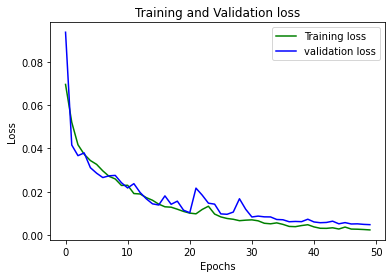

In [ ]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,50)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('1st.png')
plt.show()

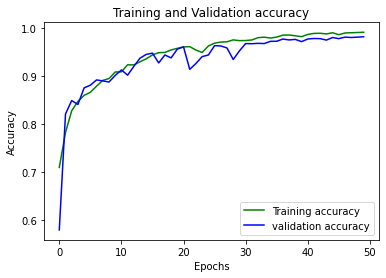

In [ ]:
loss_train =history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,50)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.layers import LSTM, GRU, Conv1D , Bidirectional
model =Sequential()
#model.add(Conv1D(128,3,activation='relu',input_shape=X_train[0].shape))

#model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(128, activation='relu', input_shape=(n_timesteps,n_features) ,return_sequences=True)))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(128, activation='relu',return_sequences=True)))
model.add(Dropout(0.3))
#model.add(Flatten())
model.add(GRU(32, activation="relu") #return_sequences=True))
model.add(GRU(32, activation="relu") #return_sequences=True))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate = 0.001), loss = 'mse', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 10, validation_data= (X_test, y_test), verbose=1)

In [ ]:
1#CNN model
cnn_model = Sequential([
                        Conv1D(64,3, activation='relu', input_shape=(n_timesteps,n_features)),
                        MaxPooling1D(pool_size=2),
                        Flatten(),
                        Dense(128, activation='relu'),
                        Dropout(0.3),
                        Dense(n_outputs, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
cnn_model.summary()

In [ ]:
cnn_model_history = cnn_model.fit(X_train, y_train, epochs=10, validation_split=0.15, shuffle=True)

In [ ]:
y_pred=cnn_model.predict(X_test)
Y_pred = np.argmax(y_pred,axis=1)
Y_test = np.argmax(y_test,axis=1)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('accuracy:', accuracy_score(Y_test,Y_pred))
confusion_matrix(Y_test,Y_pred)

In [ ]:
print('accuracy:', accuracy_score(Y_test,Y_pred))

In [ ]:
#Importing libraries
import sys 
import numpy
import xlrd #excel read
import pandas as pd
import os
import matplotlib.pyplot as plt
import io
import math
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from scipy.signal import savgol_filter
from scipy import signal
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
 
from tensorflow import keras, convert_to_tensor, float32, make_ndarray
from tensorflow.compat.v1 import Session
from tensorflow.keras import layers, backend
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Input, GlobalAveragePooling1D, Dropout
from tensorflow.keras.layers import LSTM, GRU, Conv1D, MaxPooling1D, MaxPool1D, TimeDistributed, RepeatVector, Conv2D
from keras.layers.merge import concatenate
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import random
from sklearn.metrics import mean_absolute_error

In [ ]:
#MAE
predicted_value=cnn_model.predict(X_test)[0]
mean_absolute_error(y_test[0],predicted_value)

In [ ]:
2#GRU model
gru_model = Sequential([
                        GRU(128,  input_shape=(n_timesteps,n_features)),
                        Dense(128, activation='relu'),
                        Dropout(0.3),
                        Dense(n_outputs, activation='relu')
])

gru_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
gru_model.summary()

In [ ]:
gru_model_history = gru_model.fit(X_train, y_train, epochs=10, validation_split=0.15, shuffle=True)

In [ ]:
# Print confusion matrix for training data
y_pred_train = cnn_model.predict(X_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#print(classification_report(trainy, max_y_pred_train))

# confusion matrix
LABELS = ['WALKING',
          'WALKING_UPSTAIRS',
          'WALKING_DOWNSTAIRS',
          'SITTING',
          'STANDING',
          'LAYING']
y_pred_test = cnn_model.predict(X_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test, axis=1)

matrix = metrics.confusion_matrix(max_y_test, max_y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(matrix,
            cmap='PuOr',
            linecolor='black',
            linewidths=1,
            xticklabels=LABELS,
            yticklabels=LABELS,
            annot=True,
            fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
accuracy_score(max_y_test, max_y_pred_test)

In [ ]:
#checkpoint = ModelCheckpoint("wisdm_weights.h5", monitor='val_acc', verbose=1, 
 #                            save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [ ]:
#1-D CNN Model
"""model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding = 'same'))
model.add(Dropout(0.4))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))"""

In [ ]:
# Load Weights
final_model = Model(inputs = model.input, outputs = model.output)
#final_model.load_weights('./har_weights.h5')
final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit network
history = final_model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=epochs, batch_size=batch_size, callbacks = [checkpoint], verbose=verbose)


# evaluate model
(loss, accuracy) = final_model.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))

In [ ]:
# Print confusion matrix for training data
y_pred_train = final_model.predict(X_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#print(classification_report(trainy, max_y_pred_train))

# confusion matrix
LABELS = ['WALKING',
          'WALKING_UPSTAIRS',
          'WALKING_DOWNSTAIRS',
          'SITTING',
          'STANDING',
          'LAYING']
y_pred_test = final_model.predict(X_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test, axis=1)

matrix = metrics.confusion_matrix(max_y_test, max_y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(matrix,
            cmap='PuOr',
            linecolor='black',
            linewidths=1,
            xticklabels=LABELS,
            yticklabels=LABELS,
            annot=True,
            fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
lstm_model =  Sequential([
                        LSTM(256, input_shape=(n_timesteps,n_features)),
  Dense(128, activation='relu'),
  Dropout(0.2),
  Dense(128, activation='relu'),
  Dropout(0.3),
  Dense(n_outputs, activation='relu')
])

lstm_model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
lstm_model.summary()

In [ ]:
lstm_model_history = lstm_model.fit(X_train, y_train, epochs=10, validation_split=0.15, shuffle=True)